In [29]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from utils.student_graph_generation import LouvainMachine

In [30]:
from utils.student_graph_generation import StudentGraphGenerator

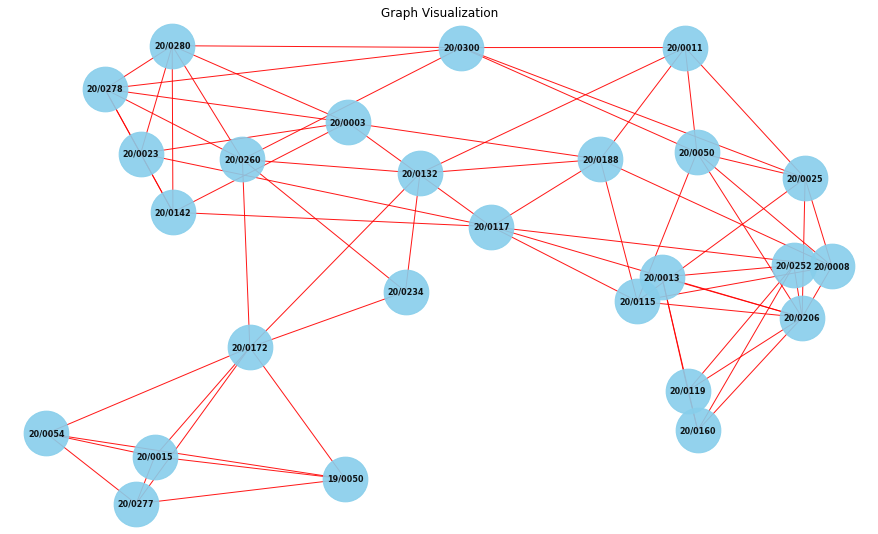

In [31]:
generator = StudentGraphGenerator('./../data/student_list.csv')


generator.consider_team_data_source('HPC', './../data/DATA_HPC.txt')
generator.consider_team_data_source('BI', './../data/DATA_TP_BI.txt')
generator.consider_team_data_source('BI', './../data/DATA_TP_MASD.txt')

# as as many data sources as you want
# generator.consider_team_data_source('HPC', './../data/DATA_HPC.txt')

# print data sources if you want
# generator.print_data_sources()

# this is necessary to assemble the different data sources 
# into on exploitable data structure
# generator.consider_constraint([
#     '20/0280','20/0278', '20/0011', '20/0132', '20/0050', '20/0025', '20/0260'
# ])
generator._generate_collaborations_list()

# generate binary graph, either worked together or not
generator.generate_graph(mode='binary')
generator.draw_graph_binary(save_option=True, save_path='./../data/figures/figure.png')
# save the graph into a pickle file
generator.export_binary_graph(export_path='./../data/graph_pickle/GRAPH0055.pkl')

# change the code above as you want

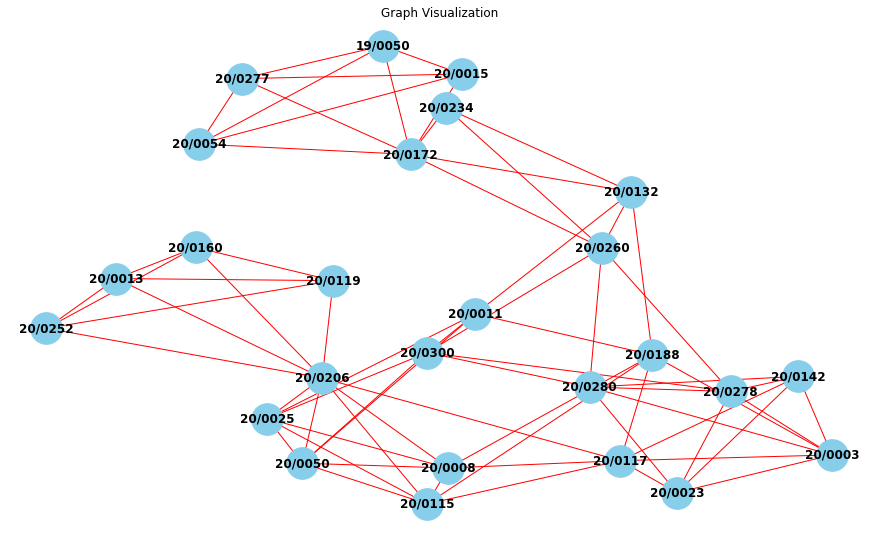

In [32]:


# generate weighted graph,
# it considers the number of times students worked together
generator.generate_graph(mode='weighted')
generator.draw_graph_weighted()
generator.export_weighted_graph(export_path='./../data/graph_pickle/GRAPH00_weighted.pkl')


In [33]:
louvain = LouvainMachine(generator.generated_binary_graph)
louvain.print_status()

>> Called constructor LouvainMachine: created graph with nodes:
['20/0013', '20/0117', '20/0277', '19/0050', '20/0050', '20/0188', '20/0160', '20/0142', '20/0023', '20/0011', '20/0172', '20/0278', '20/0115', '20/0252', '20/0300', '20/0054', '20/0206', '20/0008', '20/0025', '20/0119', '20/0260', '20/0234', '20/0015', '20/0132', '20/0280', '20/0003']
{'20/0013': {'community': '20/0013', 'people_nodes': ['20/0013']}, '20/0117': {'community': '20/0117', 'people_nodes': ['20/0117']}, '20/0277': {'community': '20/0277', 'people_nodes': ['20/0277']}, '19/0050': {'community': '19/0050', 'people_nodes': ['19/0050']}, '20/0050': {'community': '20/0050', 'people_nodes': ['20/0050']}, '20/0188': {'community': '20/0188', 'people_nodes': ['20/0188']}, '20/0160': {'community': '20/0160', 'people_nodes': ['20/0160']}, '20/0142': {'community': '20/0142', 'people_nodes': ['20/0142']}, '20/0023': {'community': '20/0023', 'people_nodes': ['20/0023']}, '20/0011': {'community': '20/0011', 'people_nodes': ['

In [34]:



# louvain.solve_communities()
result = louvain.forward_louvain()
print('there is progress :', result)
louvain.print_status()

neighbor communities ['20/0252', '20/0119', '20/0206', '20/0160']
called louvain_assign, got the following value for improvement:  True

before:
['20/0013']
after:
['20/0013', '20/0252']
{'20/0252': {'community': '20/0252', 'people_nodes': ['20/0013', '20/0252']}, '20/0117': {'community': '20/0117', 'people_nodes': ['20/0117']}, '20/0277': {'community': '20/0277', 'people_nodes': ['20/0277']}, '19/0050': {'community': '19/0050', 'people_nodes': ['19/0050']}, '20/0050': {'community': '20/0050', 'people_nodes': ['20/0050']}, '20/0188': {'community': '20/0188', 'people_nodes': ['20/0188']}, '20/0160': {'community': '20/0160', 'people_nodes': ['20/0160']}, '20/0142': {'community': '20/0142', 'people_nodes': ['20/0142']}, '20/0023': {'community': '20/0023', 'people_nodes': ['20/0023']}, '20/0011': {'community': '20/0011', 'people_nodes': ['20/0011']}, '20/0172': {'community': '20/0172', 'people_nodes': ['20/0172']}, '20/0278': {'community': '20/0278', 'people_nodes': ['20/0278']}, '20/0115'

In [35]:
louvain.solve_communities()
print('len={}'.format(len(louvain.graph_history)))
louvain.display_graph_history_tables(lambda x: display(x))

neighbor communities ['20/0252', '20/0119', '20/0206', '20/0160']
called louvain_assign, got the following value for improvement:  True

before:
['20/0013', '20/0252']
after:
['20/0013', '20/0252', '20/0119']
{'20/0119': {'community': '20/0119', 'people_nodes': ['20/0013', '20/0252', '20/0119']}, '20/0117': {'community': '20/0117', 'people_nodes': ['20/0117']}, '20/0277': {'community': '20/0277', 'people_nodes': ['20/0277']}, '19/0050': {'community': '19/0050', 'people_nodes': ['19/0050']}, '20/0050': {'community': '20/0050', 'people_nodes': ['20/0050']}, '20/0188': {'community': '20/0188', 'people_nodes': ['20/0188']}, '20/0160': {'community': '20/0160', 'people_nodes': ['20/0160']}, '20/0142': {'community': '20/0142', 'people_nodes': ['20/0142']}, '20/0023': {'community': '20/0023', 'people_nodes': ['20/0023']}, '20/0011': {'community': '20/0011', 'people_nodes': ['20/0011']}, '20/0172': {'community': '20/0172', 'people_nodes': ['20/0172']}, '20/0278': {'community': '20/0278', 'peopl

,nodes,community,people_nodes
0,20/0013,20/0013,[20/0013]
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0252,20/0252,"[20/0013, 20/0252]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0119,20/0119,"[20/0013, 20/0252, 20/0119]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0206,20/0206,"[20/0013, 20/0252, 20/0119, 20/0206]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0117,20/0117,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117]"
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0142,20/0142,[20/0142]
7,20/0023,20/0023,[20/0023]
8,20/0011,20/0011,[20/0011]
9,20/0172,20/0172,[20/0172]


,nodes,community,people_nodes
0,20/0142,20/0142,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0023,20/0023,[20/0023]
7,20/0011,20/0011,[20/0011]
8,20/0172,20/0172,[20/0172]
9,20/0278,20/0278,[20/0278]


,nodes,community,people_nodes
0,20/0023,20/0023,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0278,20/0278,[20/0278]
9,20/0115,20/0115,[20/0115]


,nodes,community,people_nodes
0,20/0278,20/0278,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0260,20/0260,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0234,20/0234,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0300,20/0300,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0132,20/0132,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0280,20/0280,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0011,20/0011,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0172,20/0172,[20/0172]
7,20/0115,20/0115,[20/0115]
8,20/0054,20/0054,[20/0054]
9,20/0008,20/0008,[20/0008]


,nodes,community,people_nodes
0,20/0172,20/0172,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0054,20/0054,[20/0054]
8,20/0008,20/0008,[20/0008]
9,20/0015,20/0015,[20/0015]


,nodes,community,people_nodes
0,20/0054,20/0054,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0008,20/0008,[20/0008]
8,20/0015,20/0015,[20/0015]
9,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0015,20/0015,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0008,20/0008,[20/0008]
8,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0277,20/0277,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,19/0050,19/0050,[19/0050]
2,20/0050,20/0050,[20/0050]
3,20/0188,20/0188,[20/0188]
4,20/0160,20/0160,[20/0160]
5,20/0115,20/0115,[20/0115]
6,20/0008,20/0008,[20/0008]
7,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,19/0050,19/0050,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0115,20/0115,[20/0115]
5,20/0008,20/0008,[20/0008]
6,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0008,20/0008,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0115,20/0115,[20/0115]
5,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0115,20/0115,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0050,20/0050,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0188,20/0188,[20/0188]
2,20/0160,20/0160,[20/0160]
3,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0003,20/0003,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0188,20/0188,[20/0188]
2,20/0160,20/0160,[20/0160]


,nodes,community,people_nodes
0,20/0188,20/0188,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0160,20/0160,[20/0160]


,nodes,community,people_nodes
0,20/0160,20/0160,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."


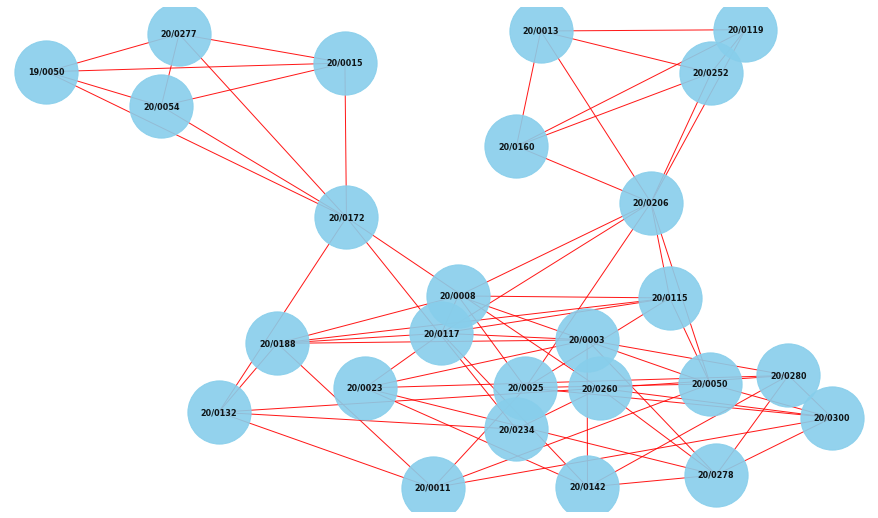

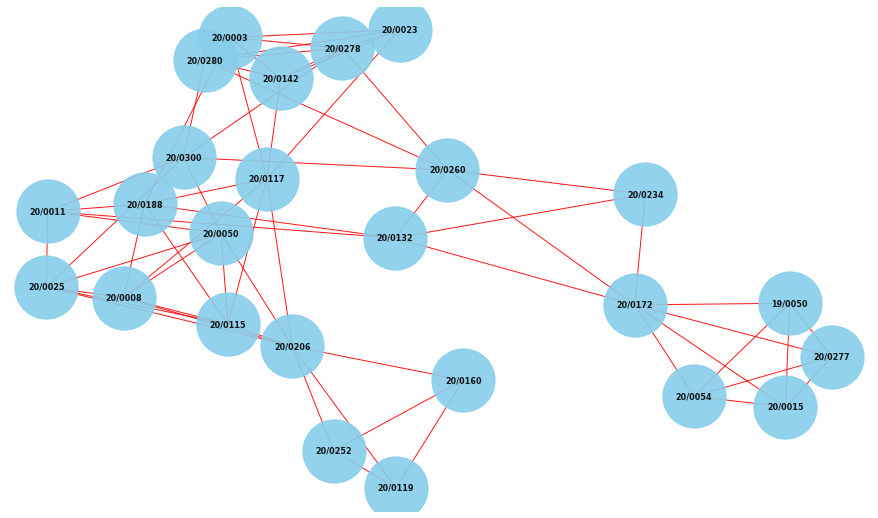

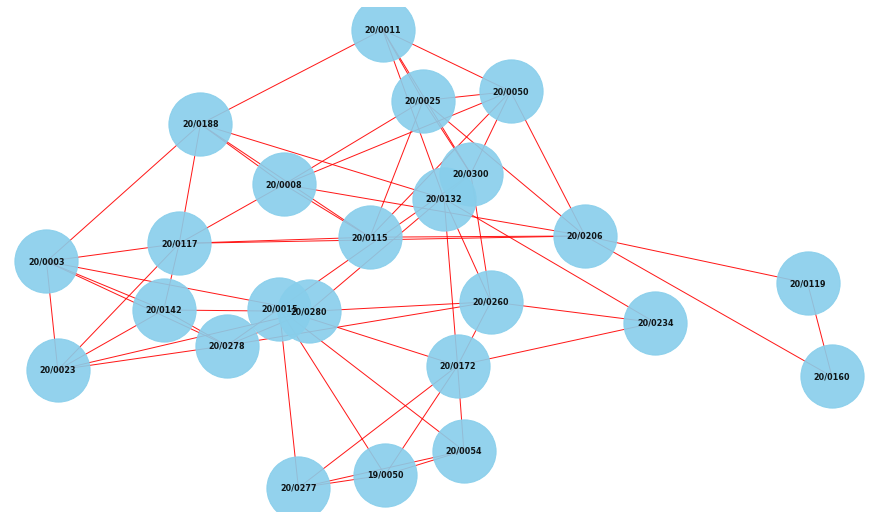

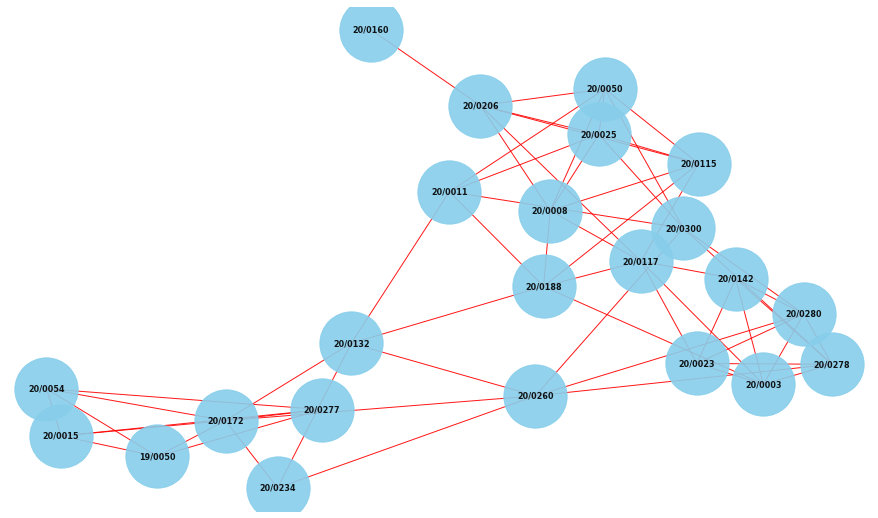

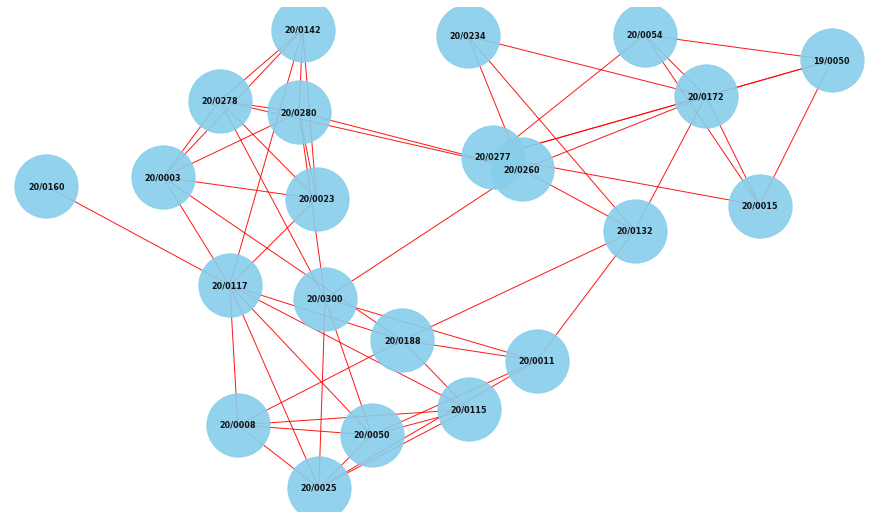

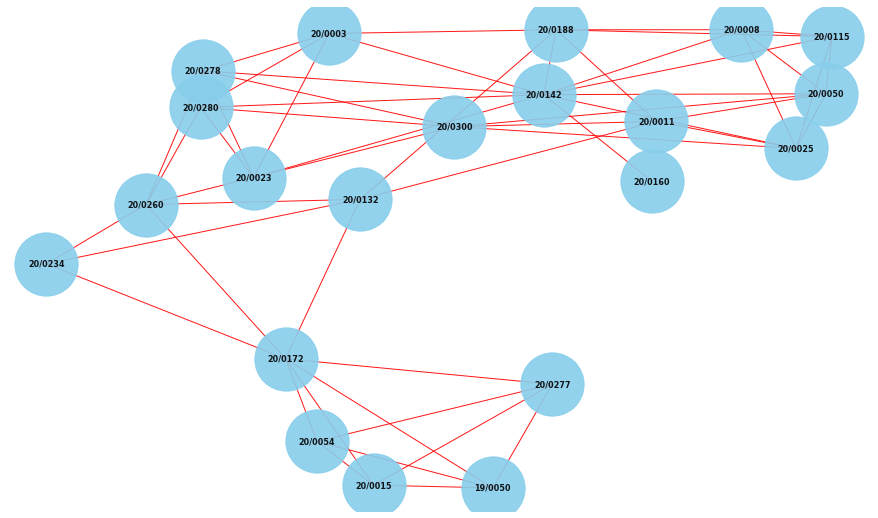

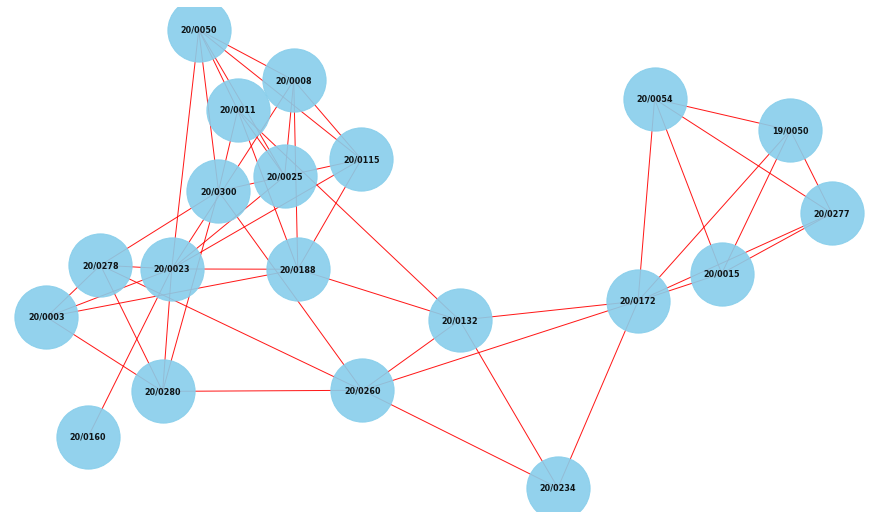

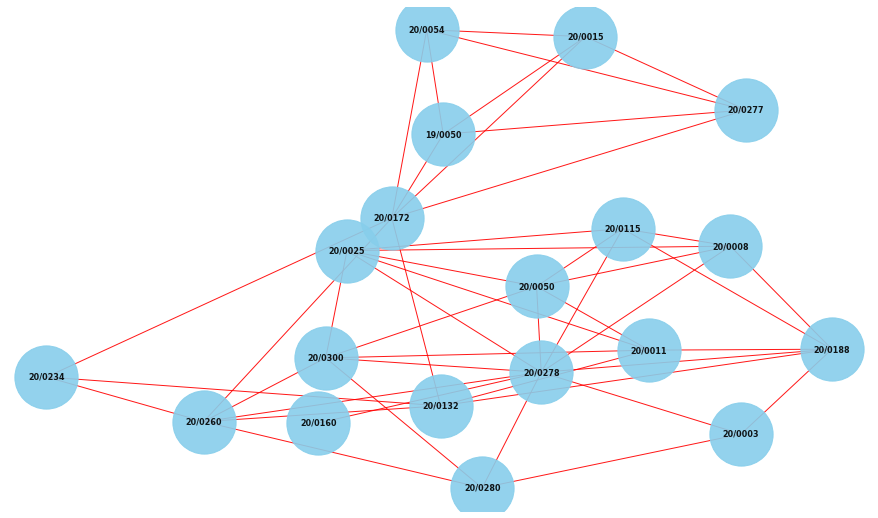

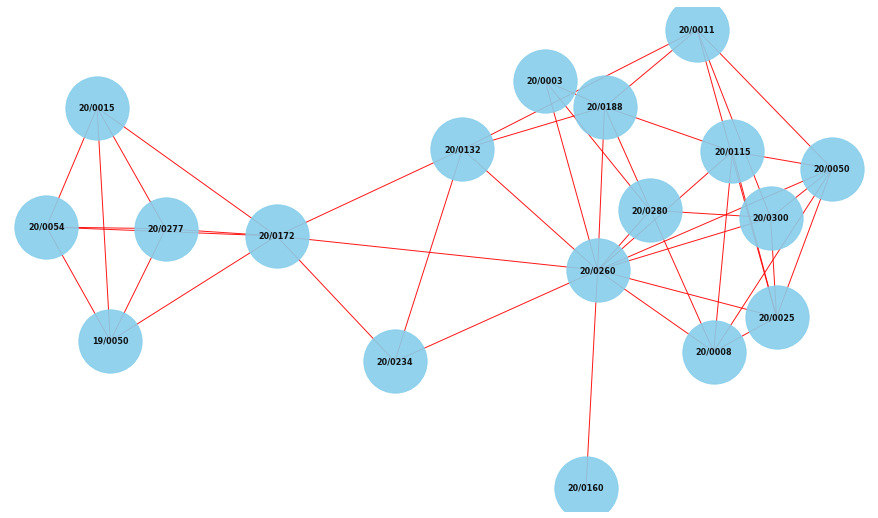

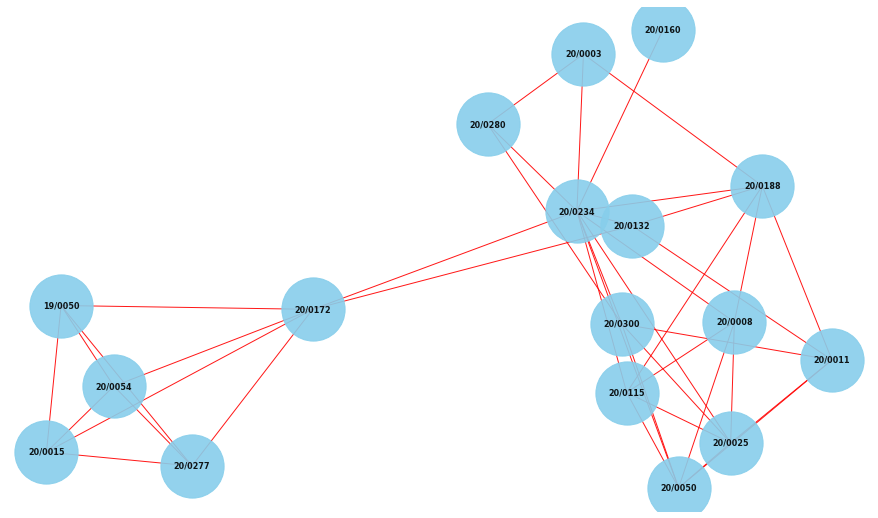

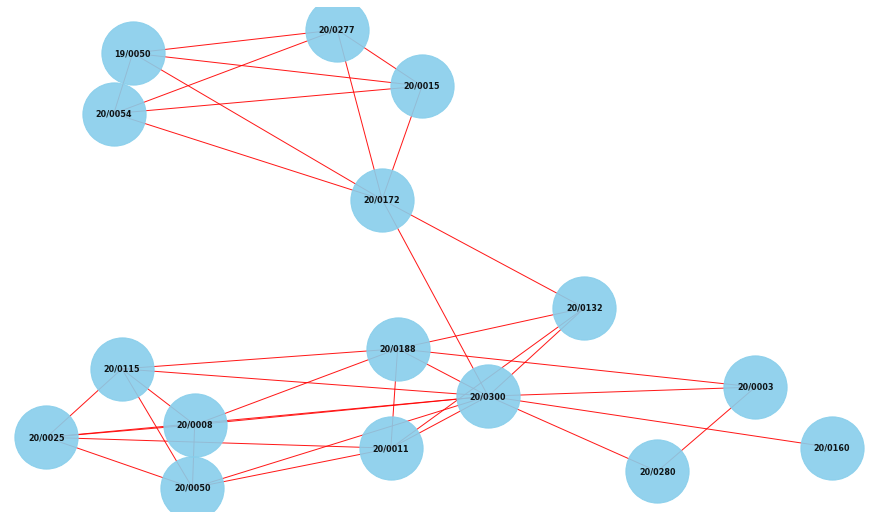

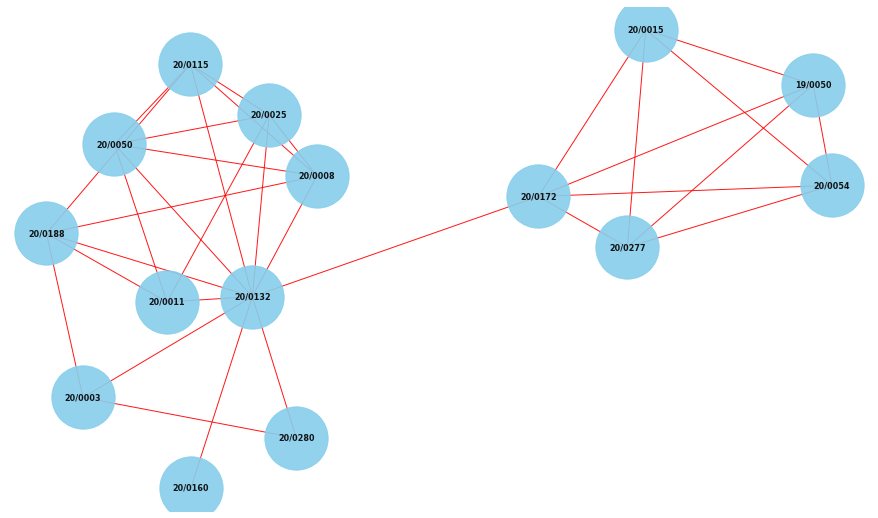

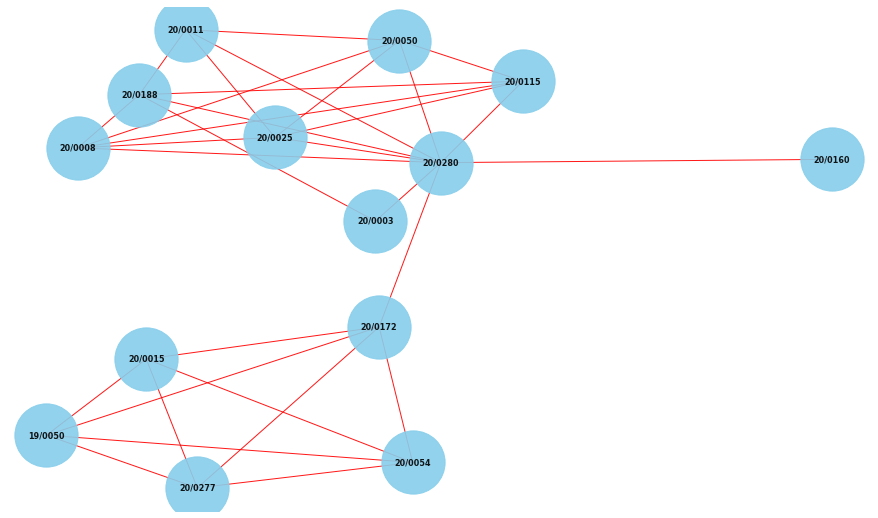

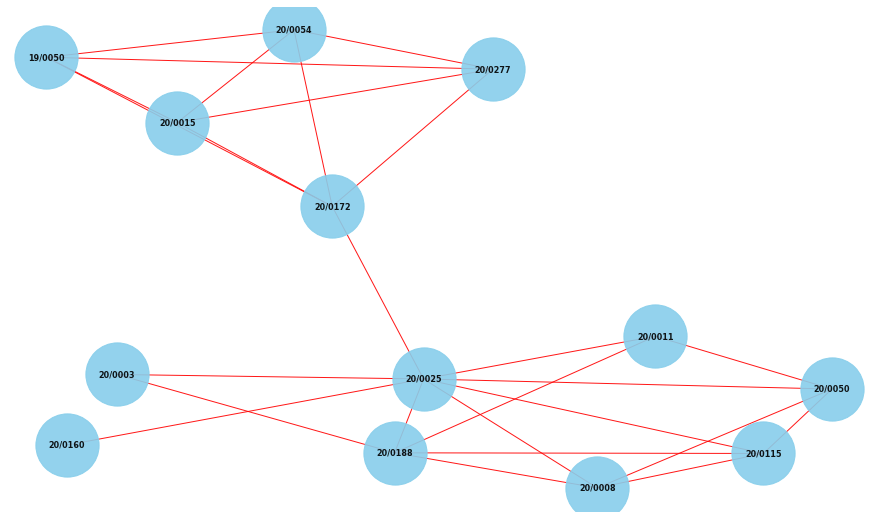

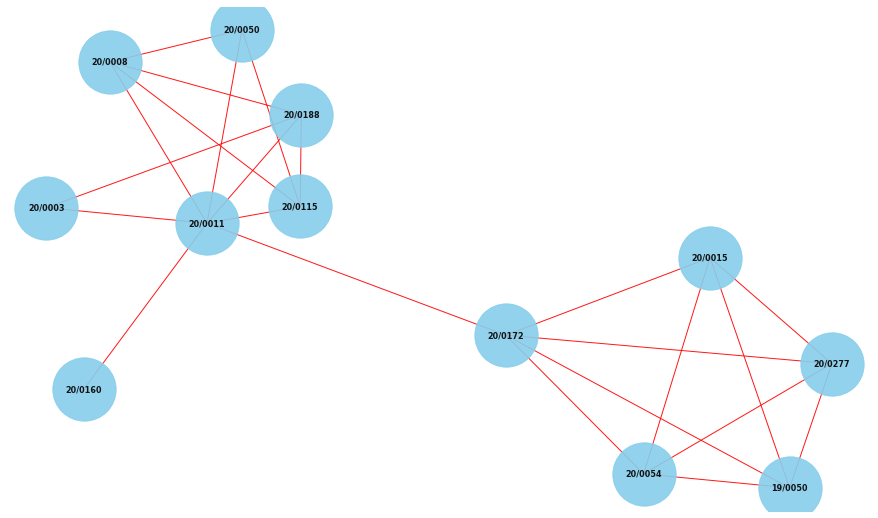

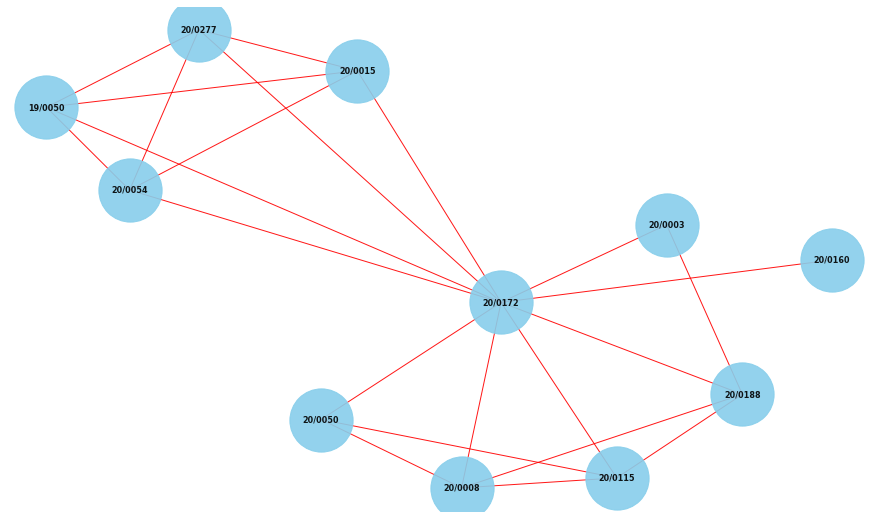

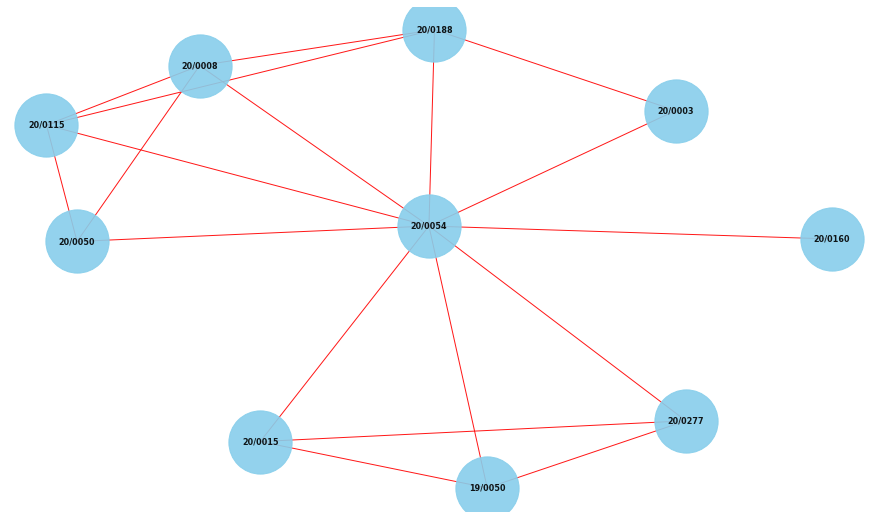

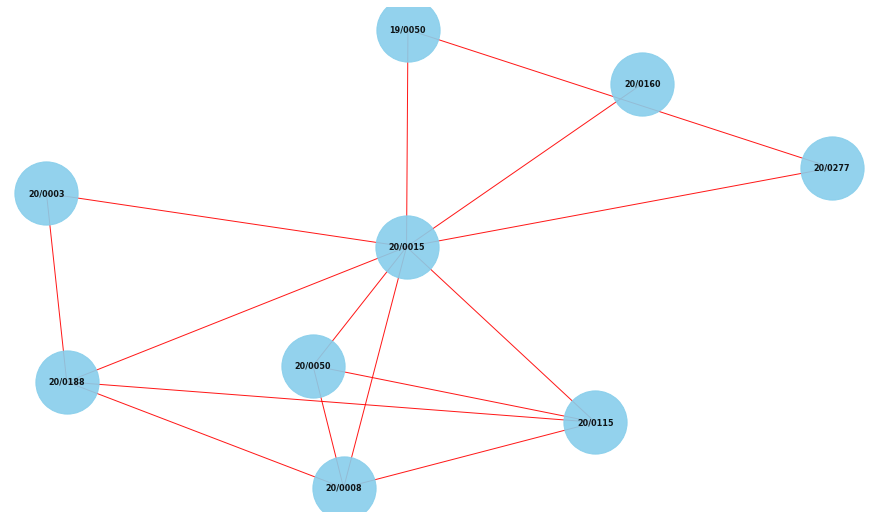

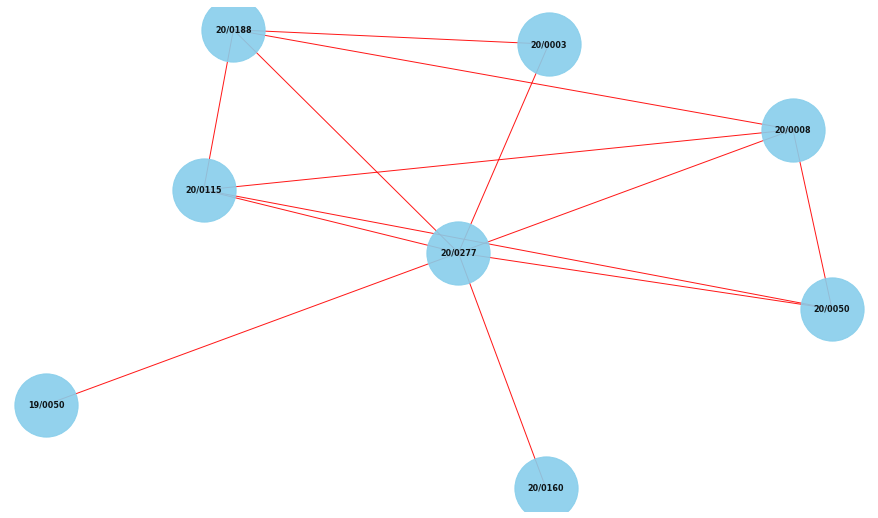

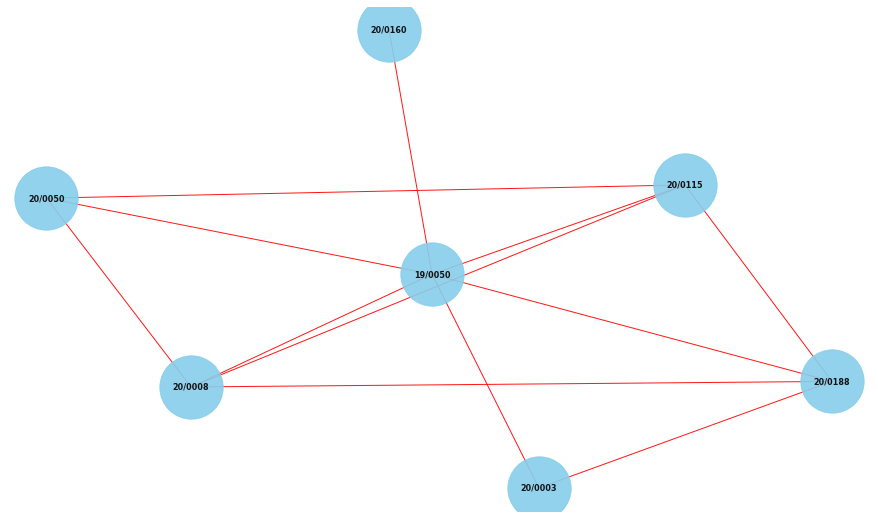

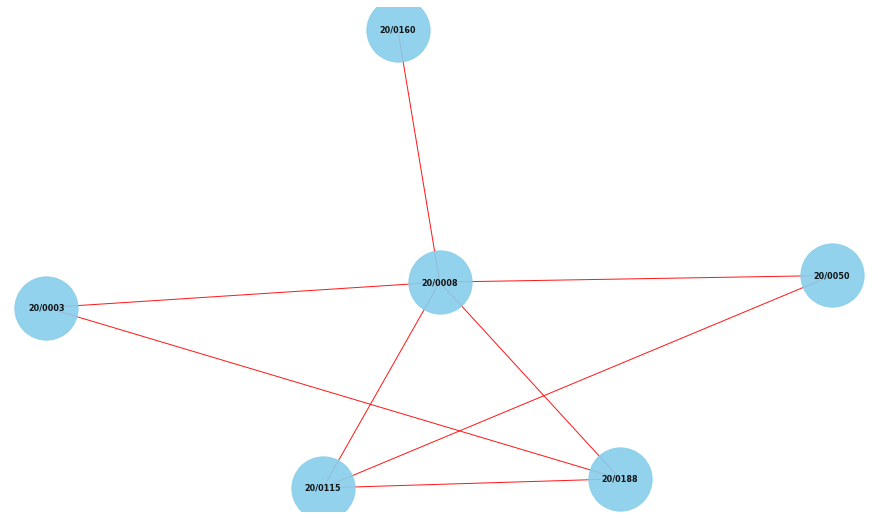

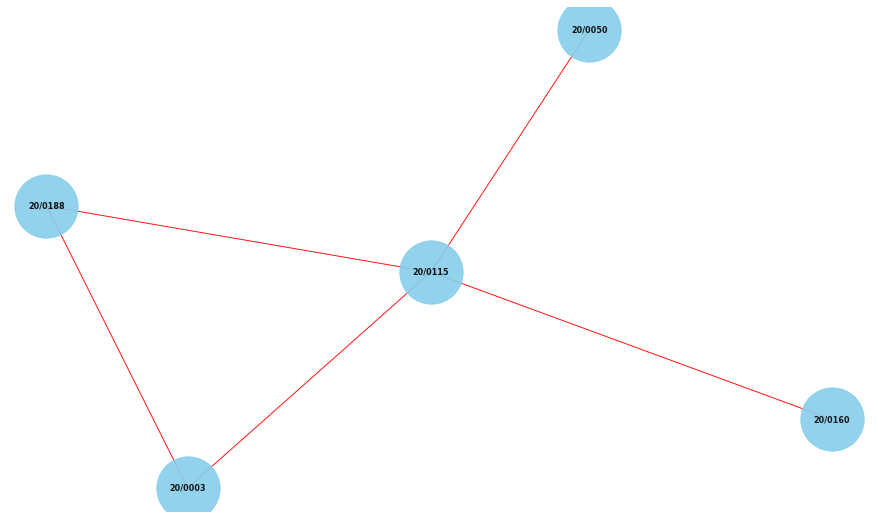

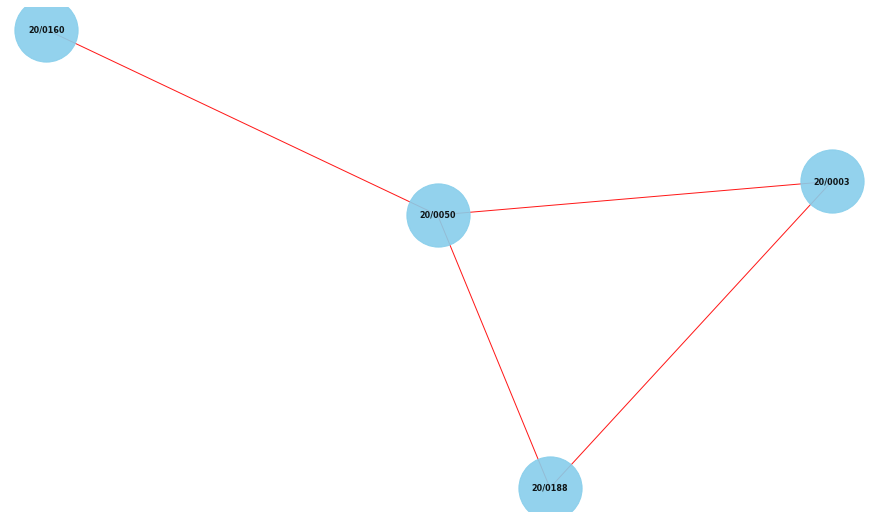

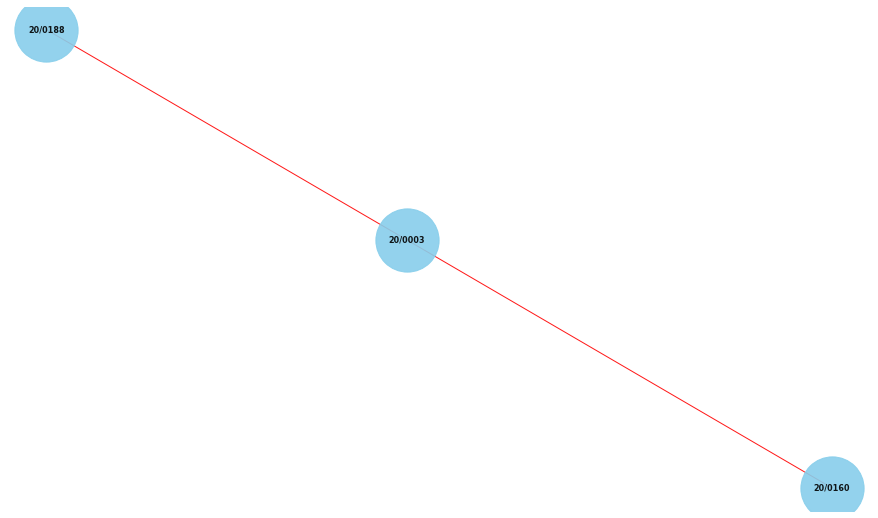

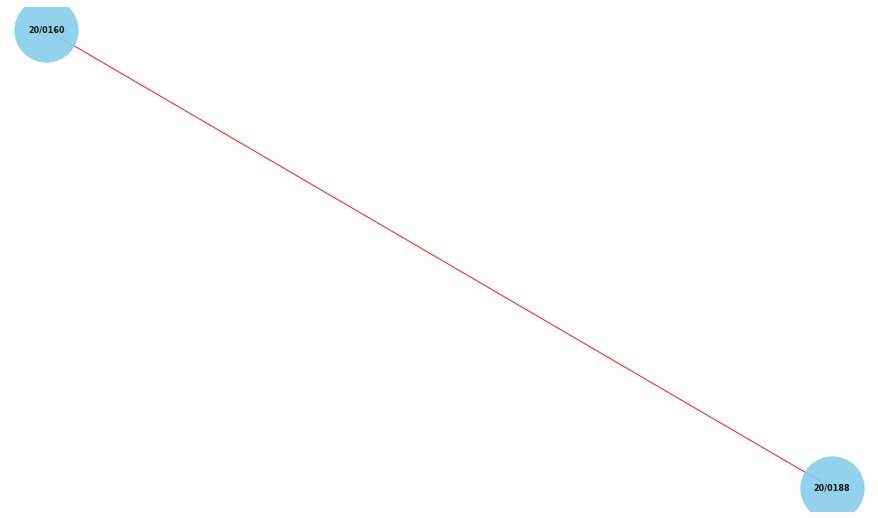

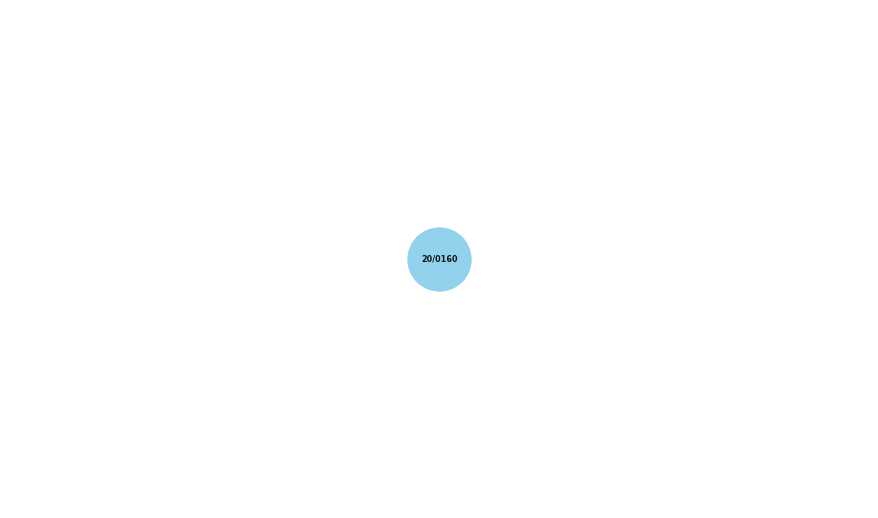

In [36]:
for g in louvain.graph_history:
    plt.figure(figsize=(12, 7))
    nx.draw(
            g,
            with_labels=True,
            alpha=0.9,
            pos=nx.spring_layout(g, k=0.9),
            node_color='skyblue',
            node_size=4000, 
            font_size=8, 
            font_color='black', 
            font_weight='bold',
            edge_color='red', width=1
            )
    plt.show()

In [37]:
louvain.display_graph_history_tables(
        display_fn = lambda x: display(x)
)

,nodes,community,people_nodes
0,20/0013,20/0013,[20/0013]
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0252,20/0252,"[20/0013, 20/0252]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0119,20/0119,"[20/0013, 20/0252, 20/0119]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0206,20/0206,"[20/0013, 20/0252, 20/0119, 20/0206]"
1,20/0117,20/0117,[20/0117]
2,20/0277,20/0277,[20/0277]
3,19/0050,19/0050,[19/0050]
4,20/0050,20/0050,[20/0050]
5,20/0188,20/0188,[20/0188]
6,20/0160,20/0160,[20/0160]
7,20/0142,20/0142,[20/0142]
8,20/0023,20/0023,[20/0023]
9,20/0011,20/0011,[20/0011]


,nodes,community,people_nodes
0,20/0117,20/0117,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117]"
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0142,20/0142,[20/0142]
7,20/0023,20/0023,[20/0023]
8,20/0011,20/0011,[20/0011]
9,20/0172,20/0172,[20/0172]


,nodes,community,people_nodes
0,20/0142,20/0142,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0023,20/0023,[20/0023]
7,20/0011,20/0011,[20/0011]
8,20/0172,20/0172,[20/0172]
9,20/0278,20/0278,[20/0278]


,nodes,community,people_nodes
0,20/0023,20/0023,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0278,20/0278,[20/0278]
9,20/0115,20/0115,[20/0115]


,nodes,community,people_nodes
0,20/0278,20/0278,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0260,20/0260,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0234,20/0234,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0300,20/0300,[20/0300]


,nodes,community,people_nodes
0,20/0300,20/0300,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0132,20/0132,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0280,20/0280,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0011,20/0011,[20/0011]
7,20/0172,20/0172,[20/0172]
8,20/0115,20/0115,[20/0115]
9,20/0054,20/0054,[20/0054]


,nodes,community,people_nodes
0,20/0011,20/0011,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0172,20/0172,[20/0172]
7,20/0115,20/0115,[20/0115]
8,20/0054,20/0054,[20/0054]
9,20/0008,20/0008,[20/0008]


,nodes,community,people_nodes
0,20/0172,20/0172,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0054,20/0054,[20/0054]
8,20/0008,20/0008,[20/0008]
9,20/0015,20/0015,[20/0015]


,nodes,community,people_nodes
0,20/0054,20/0054,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0008,20/0008,[20/0008]
8,20/0015,20/0015,[20/0015]
9,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0015,20/0015,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0277,20/0277,[20/0277]
2,19/0050,19/0050,[19/0050]
3,20/0050,20/0050,[20/0050]
4,20/0188,20/0188,[20/0188]
5,20/0160,20/0160,[20/0160]
6,20/0115,20/0115,[20/0115]
7,20/0008,20/0008,[20/0008]
8,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0277,20/0277,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,19/0050,19/0050,[19/0050]
2,20/0050,20/0050,[20/0050]
3,20/0188,20/0188,[20/0188]
4,20/0160,20/0160,[20/0160]
5,20/0115,20/0115,[20/0115]
6,20/0008,20/0008,[20/0008]
7,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,19/0050,19/0050,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0115,20/0115,[20/0115]
5,20/0008,20/0008,[20/0008]
6,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0008,20/0008,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0115,20/0115,[20/0115]
5,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0115,20/0115,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0050,20/0050,[20/0050]
2,20/0188,20/0188,[20/0188]
3,20/0160,20/0160,[20/0160]
4,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0050,20/0050,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0188,20/0188,[20/0188]
2,20/0160,20/0160,[20/0160]
3,20/0003,20/0003,[20/0003]


,nodes,community,people_nodes
0,20/0003,20/0003,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0188,20/0188,[20/0188]
2,20/0160,20/0160,[20/0160]


,nodes,community,people_nodes
0,20/0188,20/0188,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
1,20/0160,20/0160,[20/0160]


,nodes,community,people_nodes
0,20/0160,20/0160,"[20/0013, 20/0252, 20/0119, 20/0206, 20/0117, ..."
